In [81]:
#Loading All The Essential Libraries for Startup Success Prediction Project

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (for classification)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression

# Statistical Analysis (OLS)
import statsmodels.api as sm

# Warnings handling (to keep output clean)
import warnings
warnings.filterwarnings('ignore')


In [29]:
df=pd.read_csv("startup_data.csv")
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [31]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [33]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [39]:
df.duplicated().sum()

0

In [41]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [43]:
df.dropna(inplace=True)

In [55]:
df['is_funded'] = (
    df['has_VC'] + 
    df['has_angel'] + 
    df['has_roundA'] + 
    df['has_roundB'] + 
    df['has_roundC'] + 
    df['has_roundD']
) > 0

df['is_funded'] = df['is_funded'].astype(int)

df[['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'is_funded']].head(10)


,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_funded
4,1,1,0,0,0,0,1
5,0,0,0,1,0,0,1
30,0,0,1,1,0,0,1
35,0,0,0,1,0,0,1
60,0,0,0,1,0,0,1
75,1,0,0,1,0,0,1
79,1,1,0,0,0,0,1
82,1,0,0,0,0,0,1
107,0,1,0,0,0,0,1
114,1,1,0,0,0,0,1


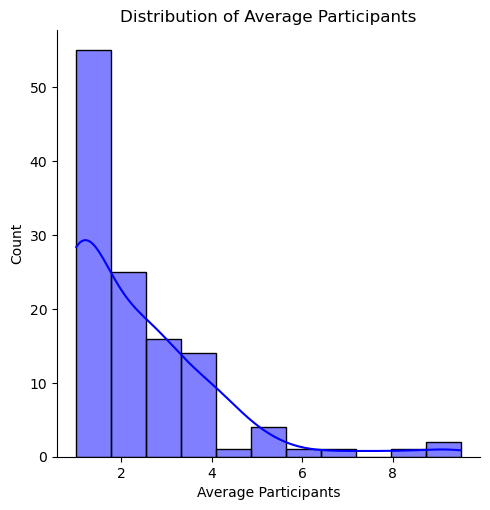

In [57]:
sns.displot(x='avg_participants', data=df, kde=True, color='blue')
plt.title('Distribution of Average Participants')
plt.xlabel('Average Participants')
plt.ylabel('Count')
plt.show()

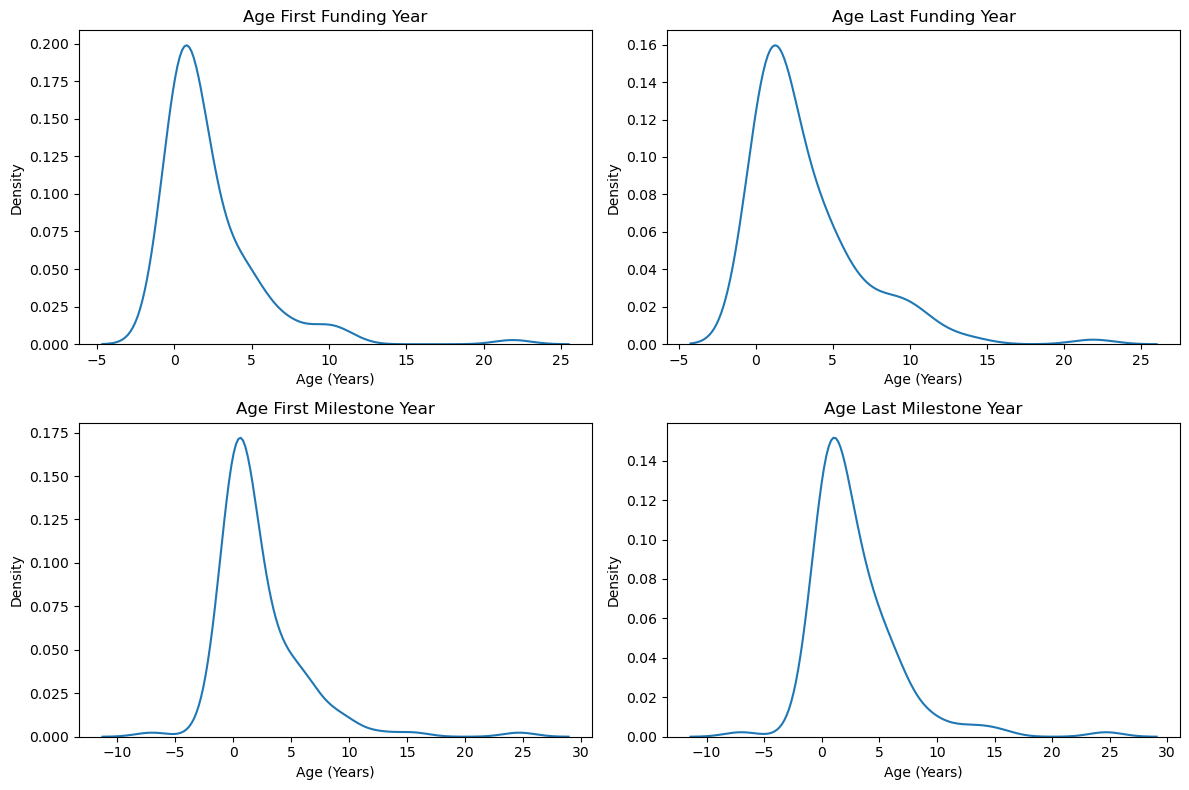

In [65]:
age_cols = ['age_first_funding_year', 'age_last_funding_year',
            'age_first_milestone_year', 'age_last_milestone_year']

plt.figure(figsize=(12, 8))


for i, col in enumerate(age_cols, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.kdeplot(data=df, x=col)
    plt.title(col.replace('_', ' ').title())
    plt.xlabel('Age (Years)')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


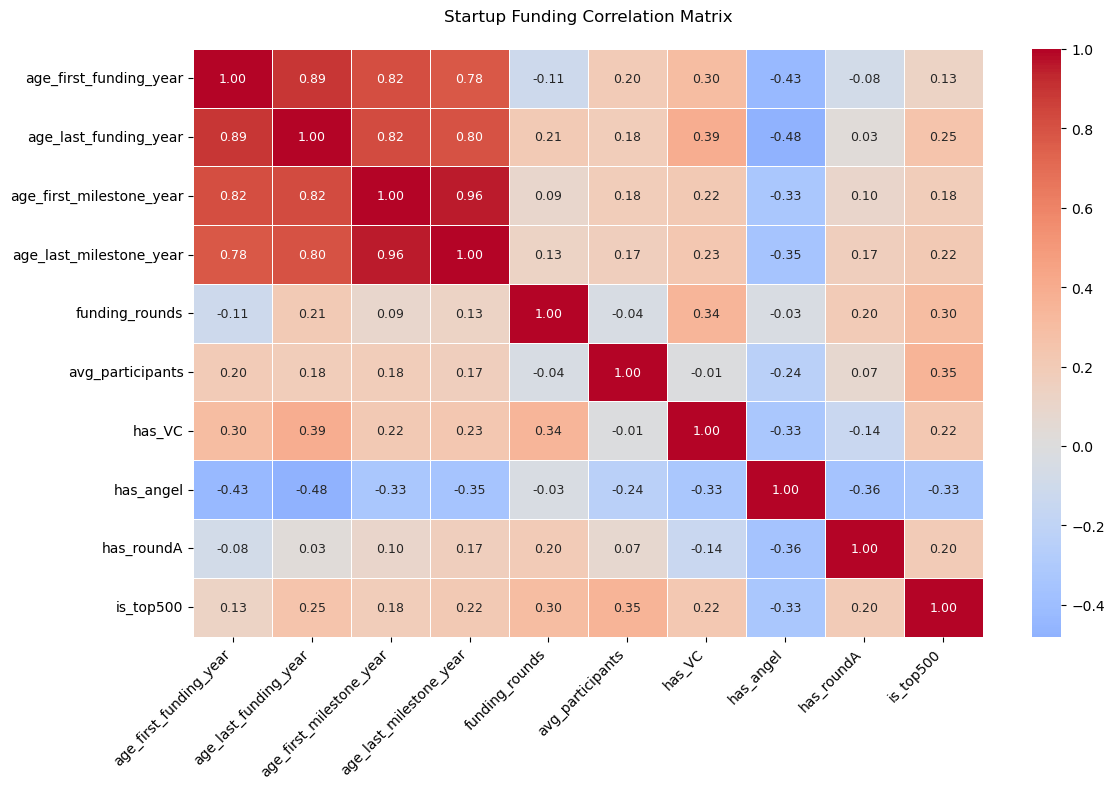

In [67]:

# Selecting numeric columns with meaningful correlations
correlation_cols = [
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year',
    'funding_rounds',
    'avg_participants',
    'has_VC',           
    'has_angel',        
    'has_roundA',       
    'is_top500'        
]

# Calculate correlations
correlation_matrix = df[correlation_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt=".2f",        # 2 decimal places
    linewidths=0.5,
    annot_kws={"size": 9}
)
plt.title('Startup Funding Correlation Matrix', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

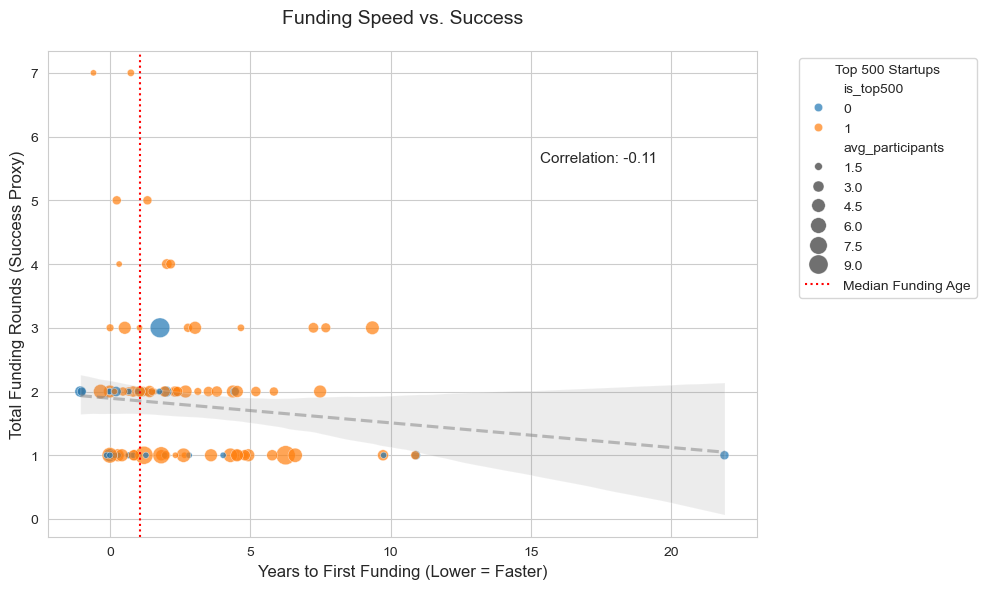

In [69]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create scatter plot with regression line
scatter = sns.scatterplot(
    data=df,
    x='age_first_funding_year',
    y='funding_rounds',
    hue='is_top500',  # Color-code top 500 startups
    palette={0: '#1f77b4', 1: '#ff7f0e'},  # Blue=normal, Orange=top500
    size='avg_participants',  # Bubble size by participant count
    sizes=(20, 200),
    alpha=0.7
)

# Add regression line (excluding categorical hue)
sns.regplot(
    data=df,
    x='age_first_funding_year',
    y='funding_rounds',
    scatter=False,
    color='grey',
    line_kws={'linestyle':'--', 'alpha':0.5}
)

# Customize plot
plt.title("Funding Speed vs. Success", pad=20, fontsize=14)
plt.xlabel("Years to First Funding (Lower = Faster)", fontsize=12)
plt.ylabel("Total Funding Rounds (Success Proxy)", fontsize=12)
plt.axvline(df['age_first_funding_year'].median(), color='red', linestyle=':', label='Median Funding Age')
plt.legend(title='Top 500 Startups', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate key insights
plt.text(
    x=df['age_first_funding_year'].max()*0.7,
    y=df['funding_rounds'].max()*0.8,
    s=f"Correlation: {df[['age_first_funding_year','funding_rounds']].corr().iloc[0,1]:.2f}",
    fontsize=11,
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

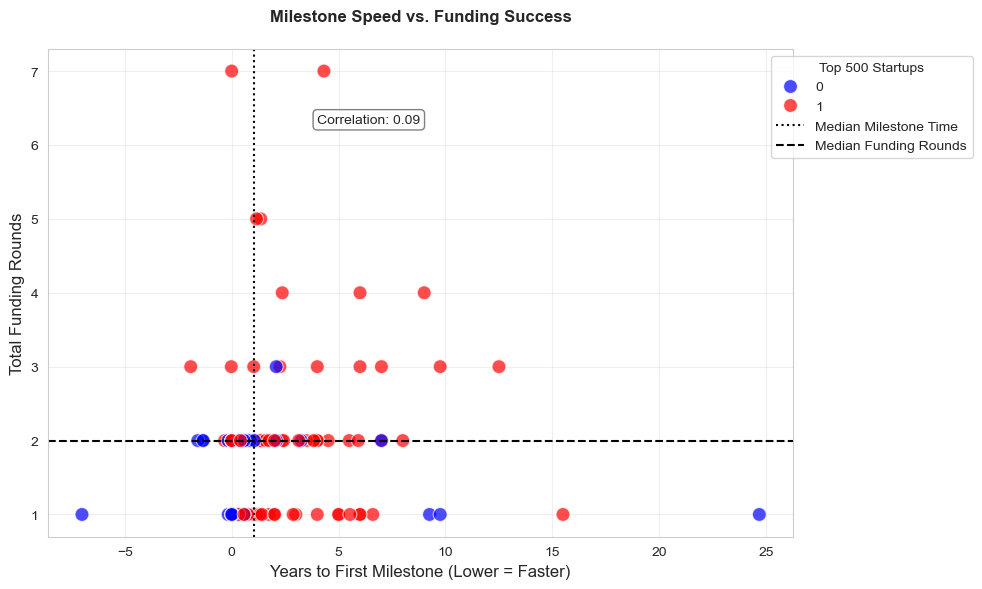

In [71]:
# Set up plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create scatter plot
scatter = sns.scatterplot(
    data=df,
    x='age_first_milestone_year',
    y='funding_rounds',
    hue='is_top500',          # Color by elite status
    palette={0: 'blue', 1: 'red'},
    alpha=0.7,
    s=100                     # Marker size
)

# Add median reference lines
plt.axvline(
    df['age_first_milestone_year'].median(), 
    color='black', 
    linestyle=':', 
    label='Median Milestone Time'
)
plt.axhline(
    df['funding_rounds'].median(), 
    color='black', 
    linestyle='--', 
    label='Median Funding Rounds'
)

# Customize
plt.title("Milestone Speed vs. Funding Success", pad=20, fontweight='bold')
plt.xlabel("Years to First Milestone (Lower = Faster)", fontsize=12)
plt.ylabel("Total Funding Rounds", fontsize=12)
plt.legend(title='Top 500 Startups', bbox_to_anchor=(1.25, 1))
plt.grid(True, alpha=0.3)

# Add correlation annotation
corr = df[['age_first_milestone_year', 'funding_rounds']].corr().iloc[0,1]
plt.text(
    x=df['age_first_milestone_year'].quantile(0.8),
    y=df['funding_rounds'].max()*0.9,
    s=f"Correlation: {corr:.2f}",
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round')
)

plt.tight_layout()
plt.show()

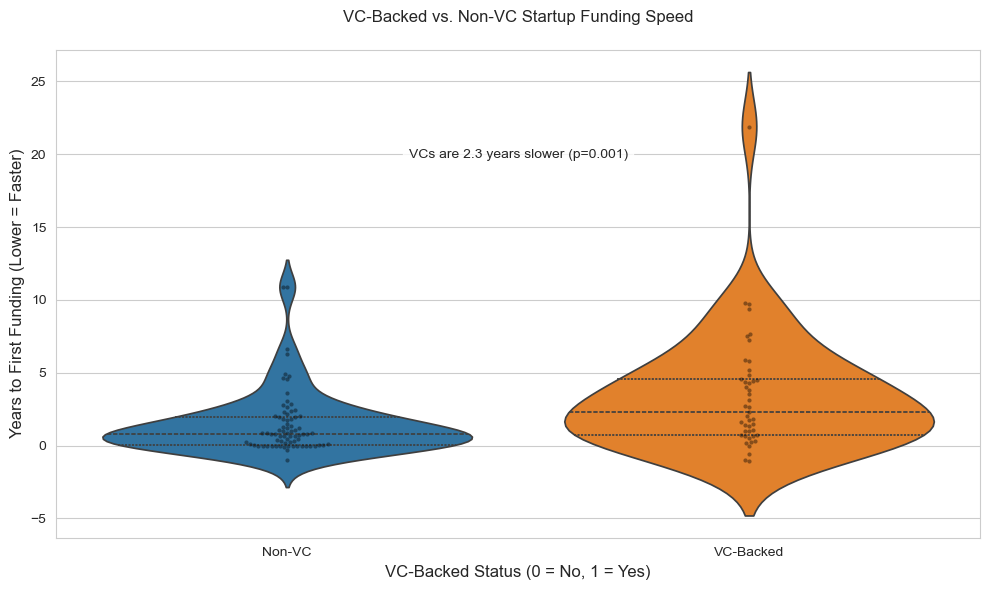

In [77]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Violin + swarm combo shows distribution and individual points
sns.violinplot(
    data=df,
    x='has_VC',
    y='age_first_funding_year',
    palette=['#1f77b4', '#ff7f0e'],  # Blue=no VC, Orange=VC
    inner='quartile'  # Shows median/IQR
)
sns.swarmplot(
    data=df,
    x='has_VC',
    y='age_first_funding_year',
    color='black',
    alpha=0.4,
    size=3
)

# Customize
plt.title("VC-Backed vs. Non-VC Startup Funding Speed", pad=20)
plt.xlabel("VC-Backed Status (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Years to First Funding (Lower = Faster)", fontsize=12)
plt.xticks([0, 1], ['Non-VC', 'VC-Backed'])

# Add statistical annotation
from scipy import stats
vc_times = df[df['has_VC']==1]['age_first_funding_year']
nonvc_times = df[df['has_VC']==0]['age_first_funding_year']
t_stat, p_val = stats.ttest_ind(vc_times, nonvc_times, nan_policy='omit')
plt.text(
    0.5, df['age_first_funding_year'].max()*0.9,
    f"VCs are {vc_times.median():.1f} years slower (p={p_val:.3f})",
    ha='center',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

In [75]:
# Independent variables (features)
X = df[[
    'age_first_funding_year',  # Speed of initial funding
    'funding_rounds',          # Total funding activity
    'has_VC',                  # Binary: 1=VC-backed, 0=not
    'avg_participants',        # Investor participation
    'has_roundA'               # Binary: raised Series A or not
]]

# Dependent variable (target)
y = df['is_top500']  # Binary outcome (1=Top 500 startup)

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.3f}")

Accuracy: 0.7777777777777778

Confusion Matrix:
[[10  6]
 [ 2 18]]

Feature Coefficients:
age_first_funding_year: 0.013
funding_rounds: 0.936
has_VC: 0.517
avg_participants: 1.077
has_roundA: 0.944


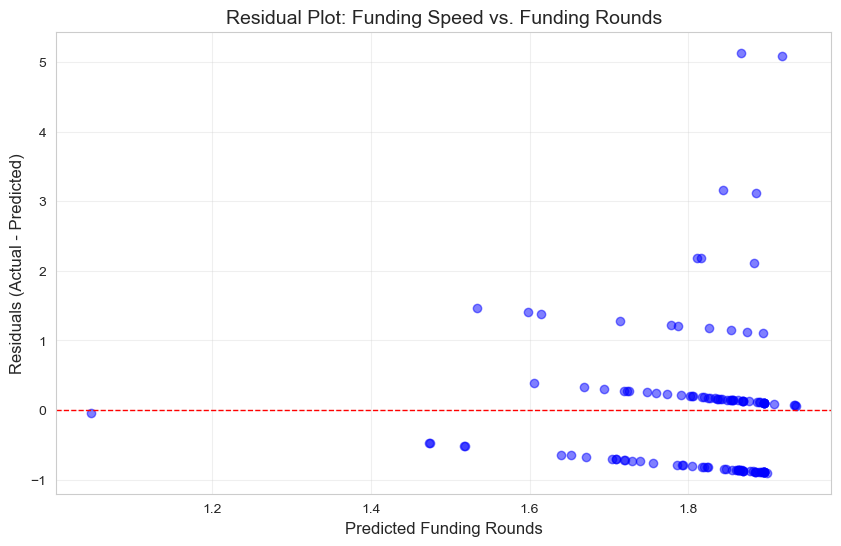

In [83]:
# Prepare data
X = df[['age_first_funding_year']] 
y = df['funding_rounds']             

# Train model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  
plt.title('Residual Plot: Funding Speed vs. Funding Rounds', fontsize=14)
plt.xlabel('Predicted Funding Rounds', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [85]:
import statsmodels.api as sm  

# Prepare data  
X = df[['age_first_funding_year', 'has_VC']]  
X = sm.add_constant(X)   
y = df['funding_rounds']  

# Fit model  
model = sm.OLS(y, X).fit()  
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:         funding_rounds   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     11.90
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.97e-05
Time:                        18:58:27   Log-Likelihood:                -168.66
No. Observations:                 120   AIC:                             343.3
Df Residuals:                     117   BIC:                             351.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

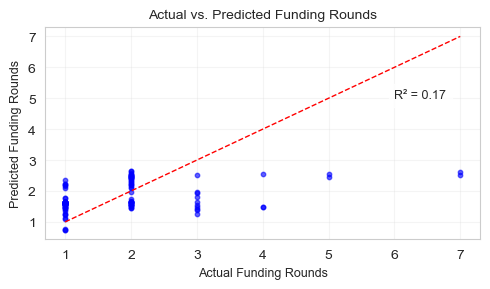

In [87]:
import matplotlib.pyplot as plt

# Generate predictions from your OLS model
y_pred = model.predict(X)  # Use the same X you fed to sm.OLS()

# Create the plot
plt.figure(figsize=(5, 3))
plt.scatter(y, y_pred, s=10, alpha=0.6, color='blue')  # y = actual funding_rounds
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=1)  # Perfect prediction line
plt.xlabel('Actual Funding Rounds', fontsize=9)
plt.ylabel('Predicted Funding Rounds', fontsize=9)
plt.title('Actual vs. Predicted Funding Rounds', fontsize=10)
plt.grid(alpha=0.2)

# Add R-squared text
plt.text(x=y.min()+5, y=y.max()-2, 
         s=f"R² = {model.rsquared:.2f}", 
         fontsize=9,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()